<a href="https://colab.research.google.com/github/Dubeyrock/computer-vision-project/blob/main/open_cv_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

In [ ]:
# to read image from the internet
path ="/content/images (2).jpg"
img = cv2.imread(path,1)  # default -> 1 (color image), 0->to read as grayscale,-1 for reading the image as unchanged

Properties the images

In [ ]:
h, w, c = img.shape
print("Dimensions of the image are:\n\nHeight:", h, "pixels\nWidth:", w, "pixels\nChannels:", c)

Dimensions of the image are:

Height: 225 pixels
Width: 225 pixels
Channels: 3


TYPES

In [ ]:
print(type(img))

<class 'numpy.ndarray'>


Datatype of the image you have just read

In [ ]:
print(img.dtype)

uint8


image pixel values

In [ ]:
print(img)

[[[200 207 170]
  [200 207 170]
  [200 207 172]
  ...
  [208 181 114]
  [209 183 113]
  [204 182 117]]

 [[200 207 170]
  [200 207 170]
  [200 207 172]
  ...
  [206 179 112]
  [208 179 112]
  [203 177 111]]

 [[200 207 170]
  [200 207 170]
  [200 207 172]
  ...
  [206 176 111]
  [205 176 109]
  [205 175 110]]

 ...

 [[118 164 198]
  [118 164 198]
  [119 165 199]
  ...
  [ 94 159 187]
  [125 156 195]
  [114 164 194]]

 [[119 164 198]
  [119 164 198]
  [120 165 199]
  ...
  [ 83 172 192]
  [126 164 196]
  [102 152 182]]

 [[127 167 195]
  [131 172 204]
  [125 171 205]
  ...
  [109 159 189]
  [110 160 190]
  [108 158 186]]]


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2

Viewing the image

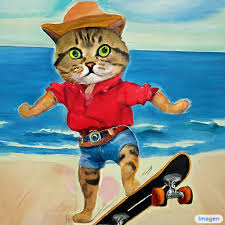

In [ ]:
cv2_imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converting image to grayscale

In [ ]:
cv2.imwrite('gfg_grey.jpg', gray)  # Saving the image

True

## Extracting the image bit planes and reconstructing it:

In [ ]:
# conda install -c conda-forge matplotlib
# conda install -c anaconda numpy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def extract_bit_plane(cd):
    #  extracting all bit one by one
    # from 1st to 8th in variable
    # from c1 to c8 respectively
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)

    # combining image again to form equivalent to original grayscale image
    cc = 2 * (2 * (2 * c8 + c7) + c6) # reconstructing image  with 3 most significant bit planes
    to_plot = [cd, c1, c2, c3, c4, c5, c6, c7, c8, cc]

    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap='gray')

    plt.tight_layout()
    plt.show()
    return cc

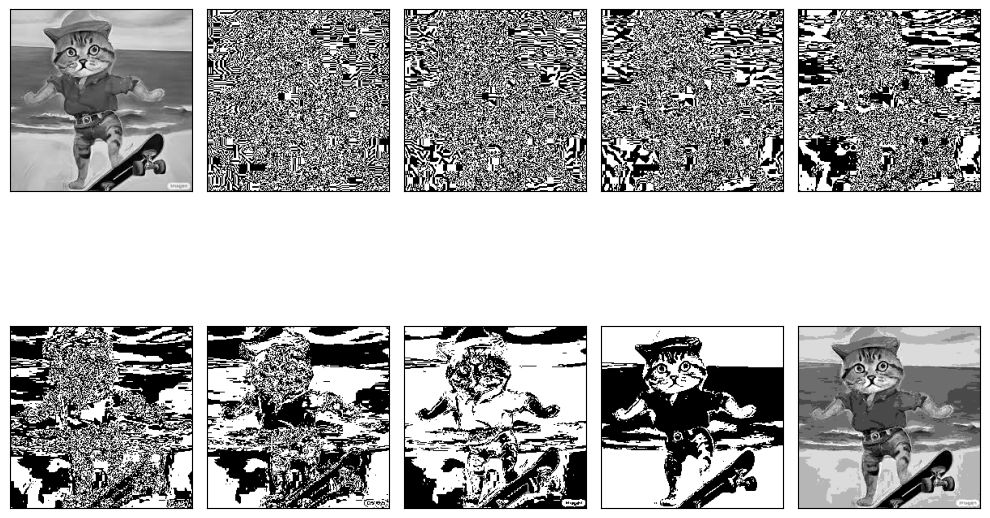

In [ ]:
reconstructed_image = extract_bit_plane(gray)

In [ ]:
con_img = np.zeros([256, 256])

con_img[0:32, :] = 40 # upper row
con_img[:, :32] = 40 #left column
con_img[:, 224:256] = 40 # right column
con_img[224:, :] = 40 # lower row


con_img[32:64, 32:224] = 80 # upper row
con_img[64:224, 32:64] = 80 # left column
con_img[64:224, 192:224] = 80 # right column
con_img[192:224, 32:224] = 80 # lower row


con_img[64:96, 64:192] = 160 # upper row
con_img[96:192, 64:96] = 160 # left column
con_img[96:192, 160:192] = 160 # right column
con_img[160:192, 64:192] = 160 # lower row

con_img[96:160, 96:160] = 220

cv2.imwrite('ConcentricSquareImage.jpg', con_img)  # Saving the image

True

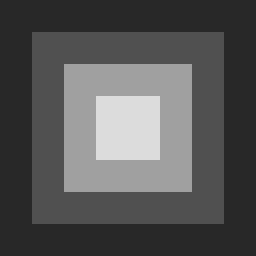

In [ ]:
cv2_imshow(con_img)